# Final Project. Forecast churn of the telecom operator clients.

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

**Interconnect's services**

Interconnect mainly provides two types of services:

 **1.** Landline communication. The telephone can be connected to several lines simultaneously.
 
 **2.** Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable.
  
Some other services the company provides include:
  
  - Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
  - A dedicated technical support line (TechSupport)
  - Cloud file storage and data backup (OnlineBackup)
  - TV streaming (StreamingTV) and a movie directory (StreamingMovies)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

# Data Description

The data consists of files obtained from different sources:

  - **contract.csv** — contract information
  - **personal.csv** — the client's personal data
  - **internet.csv** — information about Internet services
  - **phone.csv** — information about telephone services
  
In each file, the column **customerID** contains a unique code assigned to each client.

The contract information is valid as of **February 1, 2020**.

Target feature: the **EndDate** column equals **No**.

Primary metric: **AUC-ROC**.

Additional metric: **Accuracy**.

# Work Plan

**1. Import libraries and load the data.**

**2. Data preprocessing:**
 
   - Rename columns if needed
   - Merge all tables into one
   - Convert data types if needed
   - Checking missing values and work with them
   - Checking data for duplicates
   - Checking the data for anomalies and nonlogic values
   
**3. EDA:**

   - Personal information
   - Account information
   - Additional services used by customers
   - Correlations between features and target
   
**4. Feature ingineering:**

   - Splitting dataset into training and test sets
   - Encoding and scaling
   
**5. Model building:**

   - Logistic Regression Classifier
   - DecisionTreeClassifier
   - Random Forest Classifier
   - CatBoostClassifier
   - Sanity check
   

**6. Comparing the results of models.**

   - Compare results of all models and choose the best one
   - Tune it and see if result will be better
   - Check the model on  the test set

**7. Importance of features for the best model.**

**8. Conclusion.**



## Import libraries and load the data.

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OrdinalEncoder 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from catboost import Pool, cv
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

**Contract**

In [2]:
try:
    contract = pd.read_csv(r'C:\Users\yoheved\Downloads\contract.csv', parse_dates=['BeginDate','EndDate'])
except:
    contract = pd.read_csv('/datasets/contract.csv')

In [3]:
contract.sample(15)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5258,8634-CILSZ,2014-03-01,2019-12-01 00:00:00,One year,Yes,Bank transfer (automatic),104.70,7220.35
6594,8317-BVKSO,2018-12-01,No,Month-to-month,Yes,Electronic check,20.05,299.3
741,6923-JHPMP,2019-12-01,No,Month-to-month,Yes,Electronic check,80.45,137.1
4230,5108-ADXWO,2019-02-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,73.50,791.75
4939,9975-SKRNR,2020-01-01,No,Month-to-month,No,Mailed check,18.90,18.9
4225,5345-BMKWB,2019-06-01,No,Month-to-month,No,Mailed check,20.25,158.35
3117,9844-FELAJ,2014-04-01,No,One year,Yes,Electronic check,107.90,7475.85
4791,7808-DVWEP,2019-11-01,No,Month-to-month,No,Bank transfer (automatic),20.00,49.65
5216,3034-ZBEQN,2016-01-01,2020-01-01 00:00:00,One year,No,Mailed check,34.70,1604.5
905,0781-LKXBR,2019-02-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,100.50,918.6


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


**Internet**

In [5]:
try:
    internet = pd.read_csv(r'C:\Users\yoheved\Downloads\internet.csv')
except:
    internet = pd.read_csv('/datasets/internet.csv')

In [6]:
internet.sample(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4194,5701-GUXDC,DSL,Yes,No,Yes,No,No,No
4647,7395-XWZOY,DSL,Yes,Yes,Yes,Yes,Yes,No
3647,7486-KSRVI,Fiber optic,No,No,No,Yes,Yes,Yes
3656,0345-XMMUG,Fiber optic,No,Yes,Yes,Yes,Yes,Yes
889,1271-UODNO,DSL,No,No,No,Yes,No,No


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


**Personal**

In [8]:
try:
    personal = pd.read_csv(r'C:\Users\yoheved\Downloads\personal.csv')
except:
    personal = pd.read_csv('/datasets/personal.csv')

In [9]:
personal.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
4387,5868-YTYKS,Male,0,No,Yes
3454,6773-LQTVT,Female,1,Yes,Yes
6557,8709-KRDVL,Female,0,No,No
3837,3932-CMDTD,Female,0,No,No
4421,4636-JGAAI,Male,0,Yes,No


In [10]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


**Phone**

In [11]:
try:
    phone = pd.read_csv(r'C:\Users\yoheved\Downloads\phone.csv')
except:
    phone = pd.read_csv('/datasets/phone.csv')

In [12]:
phone.sample(5)

,customerID,MultipleLines
6069,4989-LIXVT,Yes
5787,6994-FGRHH,No
5605,8033-VCZGH,Yes
3908,6899-PPEEA,Yes
794,9342-VNIMQ,Yes


In [13]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Datasets were loaded successfuly. On the first look all tables can be merged on the customerID column. After merging we will have missing values in phone and internet data since obviously not all users use those services. Also would be not bad to rename column gender to Gender so it won't be differ from others. Also need to investigate column 'EndDate' and see how much customers left and how I can encode the information about this. Also TotalCharges columns has a type object need to convert it to float.

## Data Preprocessing

In [14]:
personal.rename(columns={'gender': 'Gender'}, inplace=True)

In [15]:
full = contract.merge(personal, on=['customerID'], how='outer') \
                .merge(internet, on=['customerID'], how='outer') \
                .merge(phone,    on=['customerID'], how='outer')

In [16]:
full.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [17]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

As I thought after merging the tables missing values appeared. It is because not all client use services like internet or phone. So will be logical to replace them with 'No'.

In [18]:
full['InternetService'].fillna('No internet', inplace=True)
full['MultipleLines'].fillna('No phone', inplace=True)

In [19]:
for column in full.columns[12:]:
    if column == 'internet_service':
        full[column].cat.add_categories('No', inplace=True)
    
    full[column].fillna('No', inplace=True)

In [20]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

As I mentioned before 'TotalCharges' columns should have a float type and not an object. Need to check why we have object type there.

In [21]:
full[pd.to_numeric(full.TotalCharges, errors='coerce').isnull()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No phone
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,No internet,No,No,No,No,No,No,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,No internet,No,No,No,No,No,No,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No phone
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,No internet,No,No,No,No,No,No,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,No internet,No,No,No,No,No,No,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,No internet,No,No,No,No,No,No,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,No internet,No,No,No,No,No,No,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


Ok, as we see we have 11 customers who signed a contract only on 1 of February of 2020. As we have information only till this date so those new customers haven't paid yet, that's why we have a spaces in TotalCharges column. So in this case we can fill the TotalCharges column with 0 for those clients.

In [22]:
full.TotalCharges = pd.to_numeric(full.TotalCharges, errors='coerce').fillna(0.0)

In [23]:
full.TotalCharges.isnull().sum()

0

In [24]:
full['TotalCharges'] = full['TotalCharges'].astype('float')

In [25]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

In [26]:
full['EndDate'] = pd.to_datetime(full['EndDate'], format='%Y-%m-%d', errors='coerce')

In [27]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

In [28]:
full.duplicated().sum()

0

In [29]:
full.describe()

,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.162147
std,30.090047,2266.794470,0.368612
min,18.250000,0.000000,0.000000
25%,35.500000,398.550000,0.000000
50%,70.350000,1394.550000,0.000000
75%,89.850000,3786.600000,0.000000
max,118.750000,8684.800000,1.000000


In [30]:
def replace_yes(df, col):
    full[col] = pd.Series(np.where(full[col].values == 'Yes', 1, 0),
          full.index)

After investigating the data and merging tables a missing values appeared in phone and internet services. All of them were replaced by "No internet" and "No phone" since obviously not all users use those services. In the TotalCharges column were found 11 users who just signed up their contracts and haven't paid yet, spaces were replaced by 0. Columns 'gender' was renamed as 'Gender' so it won't differ from others. Column 'BeginDate' was converted to datetime format while downloading the dataset, but column 'EndDate' was object type, because there are dates only for client who exited. So this column was converted to the datetime format with NaT values for customers who still in company.

## EDA

First of all need to add 3 features:
 1. Contract duration. For those who still in company need to count days till 1 of February 2020.
 2. Customer's exited (target)
 3. Which type of services are in use

In [31]:
full['Duration'] = full['EndDate'] - full['BeginDate']
full['Duration'] = full['Duration'].fillna(pd.to_datetime('2020-02-01') - full['BeginDate'])
full['Duration'] = full['Duration'].dt.days

In [32]:
full['Churn'] = (~full['EndDate'].isna()).astype('int')

In [33]:
full['Services'] = 0 # person use All main services
full.loc[full['MultipleLines'] == 'No phone', 'Services'] = 1 # person use only Internet service
full.loc[full['InternetService'] == 'No internet', 'Services'] = 2 # person use only Phone service

In [34]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

**Distribution of clients and churn clients according on type of contract, billing and payment method**

In [35]:
full['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

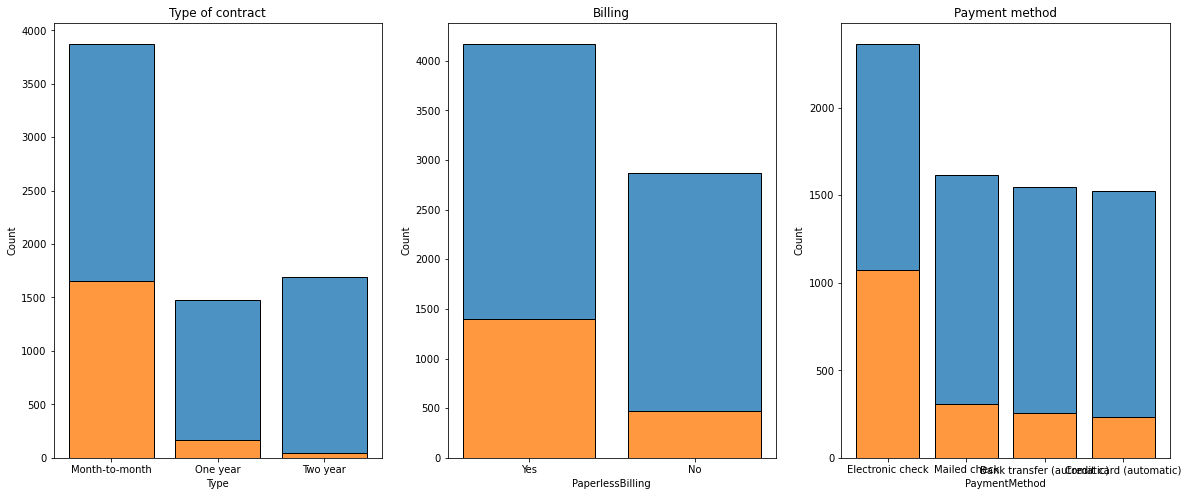

In [36]:
f, axs = plt.subplots(1, 3, figsize=(20, 8))
sns.histplot(data=full, x="Type", hue="Churn", shrink=.8, alpha=.8, legend=False, ax=axs[0], multiple="stack").set_title('Type of contract')
sns.histplot(data=full, x="PaperlessBilling", hue="Churn", shrink=.8, alpha=.8, legend=False, ax=axs[1], multiple="stack").set_title('Billing')
sns.histplot(data=full, x="PaymentMethod", hue="Churn", shrink=.8, alpha=.8, legend=False, ax=axs[2], multiple="stack").set_title('Payment method')
plt.show()

**Monthly and Total Charges**

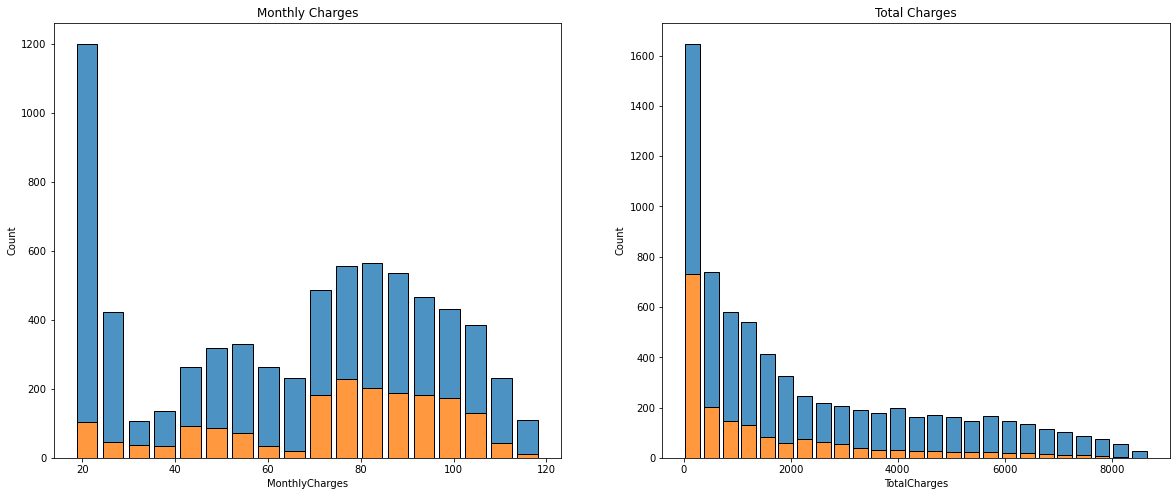

In [37]:
f, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=full, x="MonthlyCharges", hue="Churn", shrink=.8, alpha=.8, legend=False, ax=axs[0], multiple="stack").set_title('Monthly Charges')
sns.histplot(data=full, x="TotalCharges", hue="Churn", shrink=.8, alpha=.8, legend=False, ax=axs[1], multiple="stack").set_title('Total Charges')
plt.show()

**Gender, Senior citizen, partner and dependents**

In [38]:
def pie_plot(labels, title, col):
    fig = plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.axis('off')

    ax0 = fig.add_axes([.25, .3, .5, .5], aspect=1)
    fracs = full[col].value_counts().values
    ax0.pie(fracs, labels=labels, radius = 1.2, startangle=90, autopct='%.2f')
    ax0.set_xlabel('All customers')

    ax1 = fig.add_axes([0, -.4, .5, .5], aspect=1)
    fracs = full.query('Churn == 0')[col].value_counts().values
    ax1.pie(fracs, labels=labels, radius = 1.2, startangle=90, autopct='%.2f')
    ax1.set_xlabel('Loyal customers')


    ax2 = fig.add_axes([.5, -.4, .5, .5], aspect=1)
    fracs = full.query('Churn == 1')[col].value_counts().values
    ax2.pie(fracs, labels=labels, radius = 1.2, startangle=90, autopct='%.2f')
    ax2.set_xlabel('Churn customers')

    plt.show()

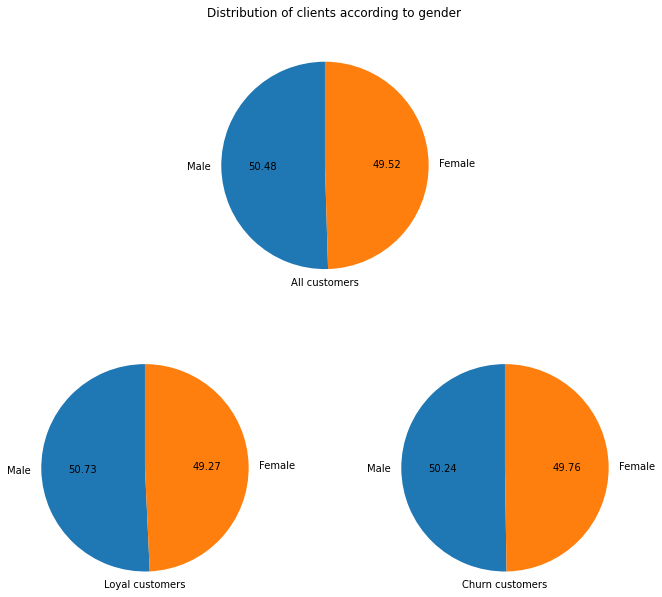

In [39]:
labels = ['Male', 'Female']
title = "Distribution of clients according to gender"
pie_plot(labels, title, 'Gender')

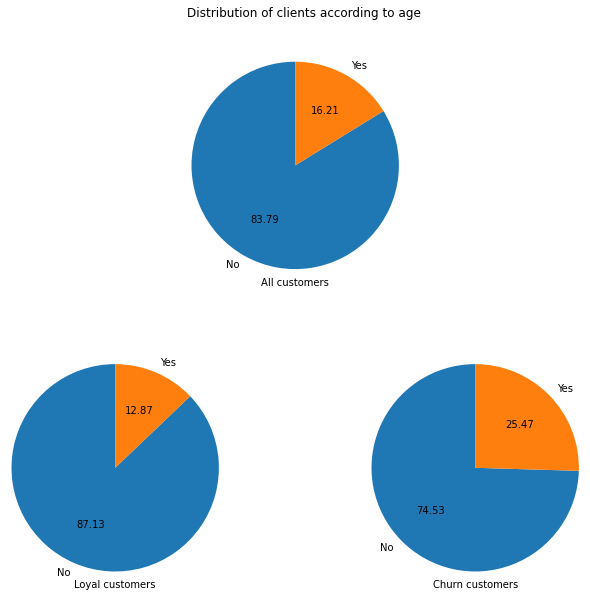

In [40]:
labels = ['No', 'Yes']
title = "Distribution of clients according to age"
pie_plot(labels, title, 'SeniorCitizen')

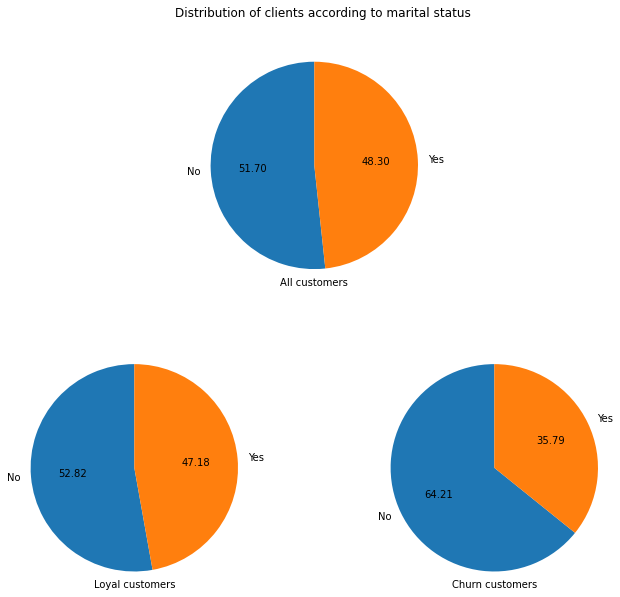

In [41]:
labels = ['No', 'Yes']
title = "Distribution of clients according to marital status"
pie_plot(labels, title, 'Partner')

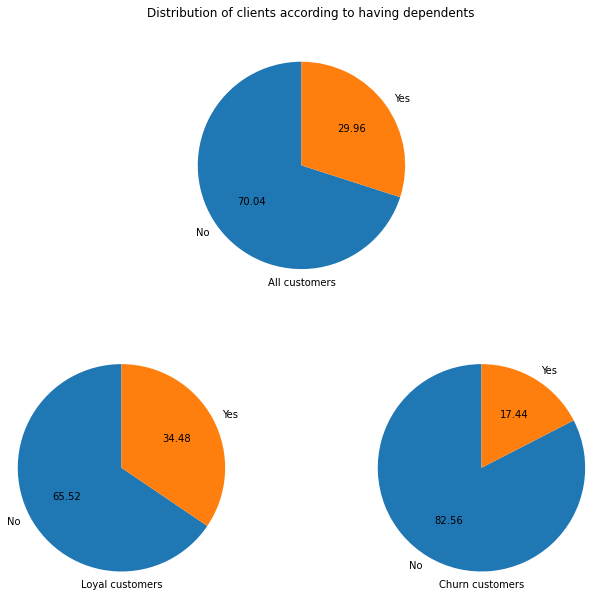

In [42]:
labels = ['No', 'Yes']
title = "Distribution of clients according to having dependents"
pie_plot(labels, title, 'Dependents')

**Services**

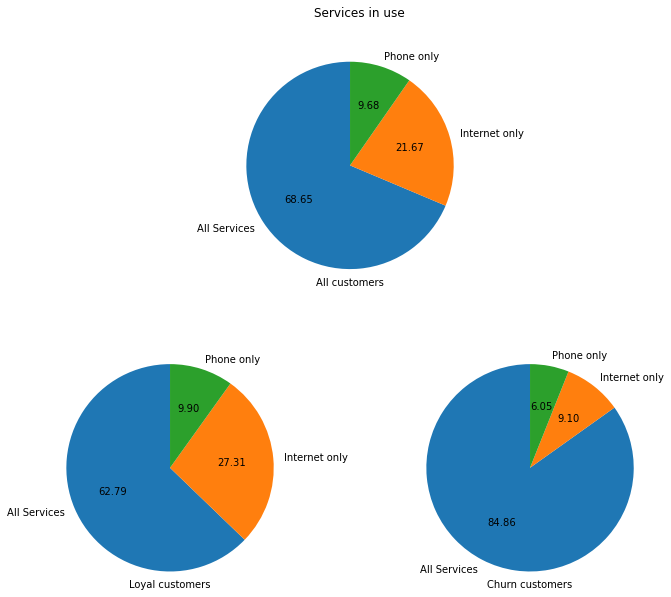

In [43]:
labels = ['All Services', 'Internet only', 'Phone only']
title = "Services in use"

pie_plot(labels, title, 'Services')

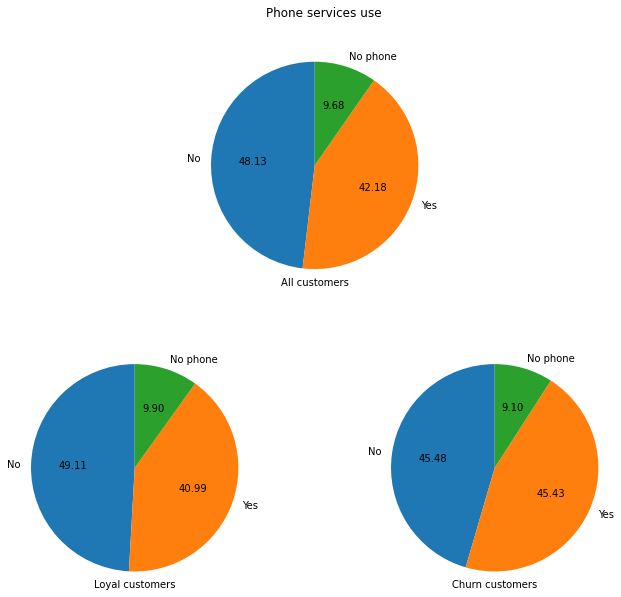

In [44]:
labels = full['MultipleLines'].value_counts().index.tolist()
title = "Phone services use"

pie_plot(labels, title, 'MultipleLines')

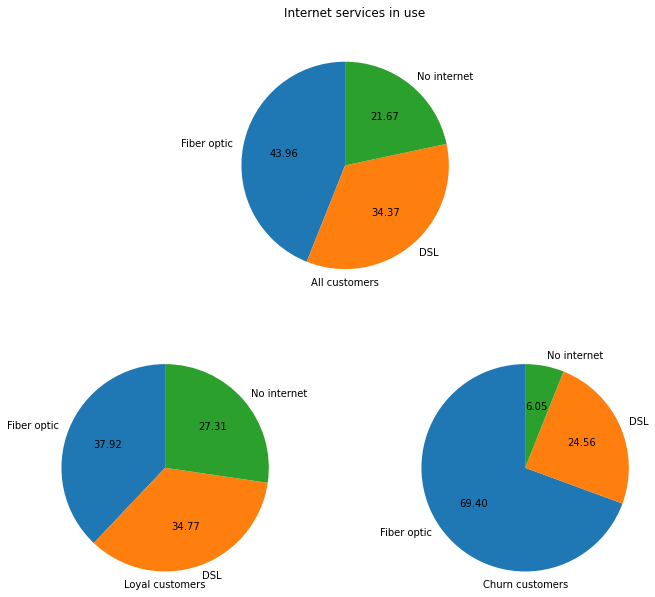

In [45]:
labels = full['InternetService'].value_counts().index.tolist()
title = 'Internet services in use'

pie_plot(labels, title, 'InternetService')

**Lifetime of customers**

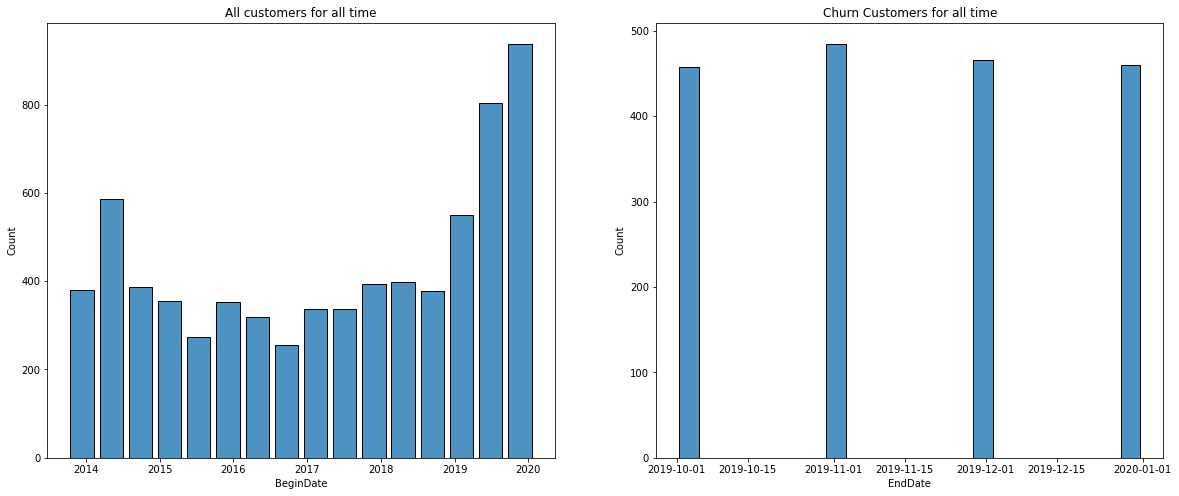

In [46]:
f, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=full, x="BeginDate", shrink=.8, alpha=.8, legend=False, ax=axs[0], multiple="stack").set_title('All customers for all time')
sns.histplot(data=full, x="EndDate", shrink=.8, alpha=.8, legend=False, ax=axs[1], multiple="stack").set_title('Churn Customers for all time')
plt.show()

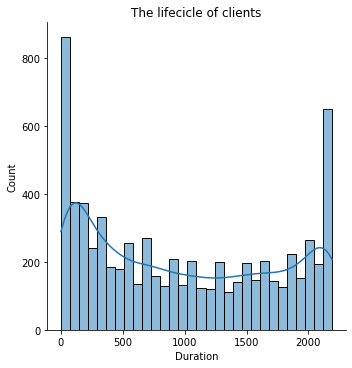

In [47]:
sns.displot(full, x="Duration", bins=30, kde=True)
plt.title("The lifecicle of clients")
plt.show()

**Correlation between target and features**

In [48]:
numeric_features = ['MonthlyCharges', 'TotalCharges', 'Duration', 'Churn']

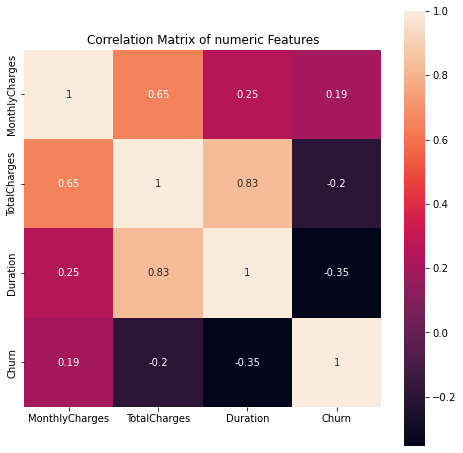

In [49]:
corr_matrix = full[numeric_features].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, robust=True, square=True, annot=True)

plt.title('Correlation Matrix of numeric Features')
plt.show()

In [50]:
full[['Churn', 'MonthlyCharges', 'TotalCharges', 'Duration']].corr()

,Churn,MonthlyCharges,TotalCharges,Duration
Churn,1.000000,0.193356,-0.198324,-0.352673
MonthlyCharges,0.193356,1.000000,0.651174,0.247754
TotalCharges,-0.198324,0.651174,1.000000,0.826109
Duration,-0.352673,0.247754,0.826109,1.000000


### EDA conclusion

**After EDA we can make such conclusions:**

 **1.** According to contract, billing and payment method data the category of churn customers mostly use Month-to-Month plan, paperless billings and electronic check payment method.
 
 **2.** Comparing the terminated and non-terminated contracts, we can see that in the terminated contracts the average monthly payment was higher, while the payment for the entire time was lower.
 
 **3.** There is no big difference between loyal and churn customers according to gender. 
 
 **4.** The number of people of retirement age is significantly less than the younger generation, but the outflow of older people is almost 2 times more than for young people.
 
 **5.** People who do not have a partner are more likely to terminate the contract.
 
 **6.** People without dependents are also prone to leaving.
 
 **7.** On the charts we see that among loyal customers there is a significant proportion of those who use only one service, primarily the Internet, among the departed customers the vast majority used all services. Considering individual services, we can say that users of several lines are less satisfied compared to one, and DSL compared to fiber.
 
**8.** On the charts, we see that contracts were actively concluded in 2014, then there was a decline with a gradual increase by 2020. But there are only 4 dates of termination of contracts, and all of them are only in 2019 and 2020. In this case, the reason may be that the data is artificial, but on real data it would be necessary first of all to check what happened on these dates. When considering the schedules of the duration of contracts, we can see that most of the contracts are terminated a short time after the conclusion, and old customers leave less often.

**9.** The strongest correlation with outflow is the number of days since the signing up the contract - it correlates negatively - the more days, the less likely it is to leave.The number of days and total costs are also strongly correlated with each other, which is quite logical, and the monthly payment with total costs.The remaining signs do not have a strong correlation with the outflow of customers.

## Feature engineering

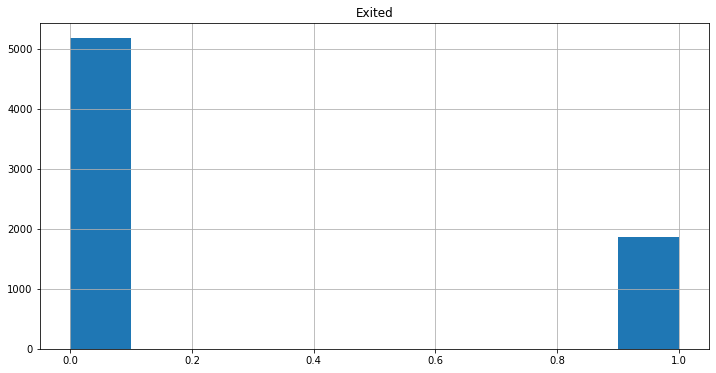

In [51]:
full.Churn.hist(figsize = (12,6))
plt.title("Exited")
plt.show()

Here we see that our target is unbalanced. Need to keep it in mind when we will build models.

In [52]:
data_ml = full.copy()

In [53]:
data_ml = data_ml.drop(['customerID', 'BeginDate', 'EndDate'], axis = 1)

In [54]:
categorials = list(data_ml.select_dtypes(include=['object']).columns)

encoder = OrdinalEncoder() 
encoder.fit(data_ml[categorials]) 

data_ml[categorials] = encoder.transform(data_ml[categorials]).astype('int64')
data_ml.head(10)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Duration,Churn,Services
0,0,1,2,29.85,29.85,0,0,1,0,0,0,1,0,0,0,0,1,31,0,1
1,1,0,3,56.95,1889.50,1,0,0,0,0,1,0,1,0,0,0,0,1036,0,0
2,0,1,3,53.85,108.15,1,0,0,0,0,1,1,0,0,0,0,0,61,1,0
3,1,0,0,42.30,1840.75,1,0,0,0,0,1,0,1,1,0,0,1,1371,0,1
4,0,1,2,70.70,151.65,0,0,0,0,1,0,0,0,0,0,0,0,61,1,0
5,0,1,2,99.65,820.50,0,0,0,0,1,0,0,1,0,1,1,2,245,1,0
6,0,1,1,89.10,1949.40,1,0,0,1,1,0,1,0,0,1,0,2,671,0,0
7,0,0,3,29.75,301.90,0,0,0,0,0,1,0,0,0,0,0,1,306,0,1
8,0,1,2,104.80,3046.05,0,0,1,0,1,0,0,1,1,1,1,2,853,1,0
9,1,0,0,56.15,3487.95,1,0,0,1,0,1,1,0,0,0,0,0,1888,0,0


Above we investigated correlation and found out that the strongest correlation have features "Days" and "Total charges". When training a model, it is necessary that there are no signs of strong correlation with each other (the quality of the model may drop), so we will remove one of the features.

In [55]:
data_ml = data_ml.drop('TotalCharges', axis = 1)

Let's split our dataset to the train and test sets in proportion 75:25. Since we have an imbalance of classes, we will use the *stratify* parameter, which will divide the samples in such a way that the class ratios are preserved in the training and test samples.

In [56]:
train, test = train_test_split(data_ml, test_size = 0.25, stratify = data_ml['Churn'], random_state=12345)

In [57]:
print('Train set:', len(train))
print('Test set:', len(test))

Train set: 5282
Test set: 1761


In [58]:
X_train = train.drop('Churn', axis = 1)
X_test  = test.drop('Churn', axis = 1)

y_train = train['Churn']
y_test  = test['Churn']

We will bring the features to a single scale, for this we will standardize the data using StandardScaler(). We will train the model only on a test sample to reduce overfitting.

In [59]:
numeric = ['MonthlyCharges', 'Duration']
scaler = StandardScaler()
scaler.fit(X_train[numeric])

X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

### Conclusion.

We successfuly made a feature ingineering. We made encoding and scaling of the dataset and splitted it to the train and test sets. So now we can start to build our models.

## Model building

First of all let's write functions for our models and metrics.

Let's train 4 models:
 - Logistic Regression Classifier
 - DecisionTreeClassifier
 - Random Forest Classifier
 - CatBoostClassifier
 

### Sanity Check

In [106]:
predicted_sanity_test = [1]*X_test.shape[0]
print("ROC-AUC score for sanity check model:", roc_auc_score(y_test, predicted_sanity_test))
print("Accuracy score for sanity check model:", accuracy_score(y_test, predicted_sanity_test))

ROC-AUC score for sanity check model: 0.5
Accuracy score for sanity check model: 0.26519023282226006


In [143]:
result = []

### Logistic Regression Classifier

In [103]:
lr = LogisticRegression(solver='liblinear',
                        random_state=12345)

scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
print("Linear regression: mean_cross_val_score = {:.3f}".format(scores.mean()))

# train
lr.fit(X_train, y_train)

Linear regression: mean_cross_val_score = 0.842


LogisticRegression(random_state=12345, solver='liblinear')

Accuracy   = 0.80
Recall     = 0.55
Precission = 0.64
F1         = 0.59
AUC-ROC    = 0.84


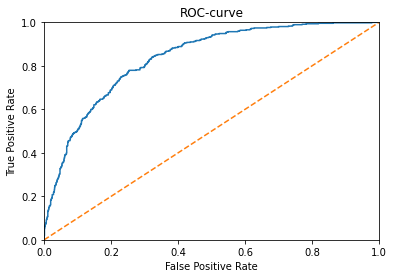

In [118]:
print('Accuracy   = {:.2f}'.format(accuracy_score(y_test, lr.predict(X_test))))
print('Recall     = {:.2f}'.format(recall_score(y_test, lr.predict(X_test))))
print('Precission = {:.2f}'.format(precision_score(y_test, lr.predict(X_test))))
print('F1         = {:.2f}'.format(f1_score(y_test, lr.predict(X_test))))
probabilities_valid = lr.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC    = {:.2f}'.format(roc_auc_score(y_test, probabilities_one_valid)))

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

### DecisionTreeClassifier


In [117]:
%%time
# tuning parameters

# fixing random state
random_state_value = 110

# parameters
rs_params = {
    'max_depth': range(2, 15, 1),
    'min_samples_leaf':range(1,6,1)
}
# create RandomizedSearchCV
tree = RandomizedSearchCV(
    DecisionTreeClassifier(
        random_state=random_state_value
        ),
        rs_params,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,
        n_iter=40)
# train model
tree.fit(X_train, y_train)

Wall time: 13.8 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=110),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': range(2, 15),
                                        'min_samples_leaf': range(1, 6)},
                   scoring='roc_auc')

In [123]:
tree.best_params_

{'min_samples_leaf': 2, 'max_depth': 6}

In [150]:
tree = DecisionTreeClassifier(max_depth=6,
                              min_samples_leaf=2,
                             random_state=12345)
scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='roc_auc')
print("DecisionTreeClassifier: mean_cross_val_score = {:.3f}".format(scores.mean()))

tree.fit(X_train, y_train)

DecisionTreeClassifier: mean_cross_val_score = 0.847


DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=12345)

Accuracy   = 0.80
Recall     = 0.43
Precission = 0.69
F1         = 0.53
AUC-ROC    = 0.83


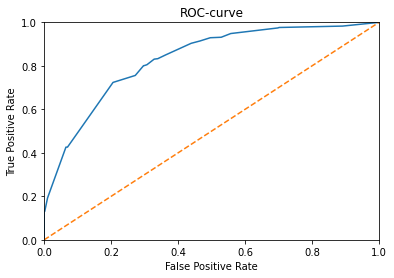

In [151]:
print('Accuracy   = {:.2f}'.format(accuracy_score(y_test, tree.predict(X_test))))
print('Recall     = {:.2f}'.format(recall_score(y_test, tree.predict(X_test))))
print('Precission = {:.2f}'.format(precision_score(y_test, tree.predict(X_test))))
print('F1         = {:.2f}'.format(f1_score(y_test, tree.predict(X_test))))
probabilities_valid = tree.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC    = {:.2f}'.format(roc_auc_score(y_test, probabilities_one_valid)))

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

### RandomForestClassifier

In [120]:
%%time
# tuning parameters

# fixing random state
random_state_value = 110

# parameters
rs_params = {
    'max_depth': range(5, 15, 1),
    'min_samples_leaf':range(1,4,1),
    'n_estimators':range(100,400,50)
}
# create RandomizedSearchCV
rf = RandomizedSearchCV(
    RandomForestClassifier(
        random_state=random_state_value
        ),
        rs_params,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,
        n_iter=40)
# train model
rf.fit(X_train, y_train)

Wall time: 40.7 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=110),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15),
                                        'min_samples_leaf': range(1, 4),
                                        'n_estimators': range(100, 400, 50)},
                   scoring='roc_auc')

In [124]:
rf.best_params_

{'n_estimators': 350, 'min_samples_leaf': 2, 'max_depth': 8}

In [155]:
rf = RandomForestClassifier(max_depth=8,
                              min_samples_leaf=2,
                              n_estimators=350,
                             random_state=12345)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
print("RandomForestClassifier: mean_cross_val_score = {:.3f}".format(scores.mean()))

rf.fit(X_train, y_train)

RandomForestClassifier: mean_cross_val_score = 0.860


RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=350,
                       random_state=12345)

Accuracy   = 0.81
Recall     = 0.51
Precission = 0.70
F1         = 0.59
AUC-ROC    = 0.86


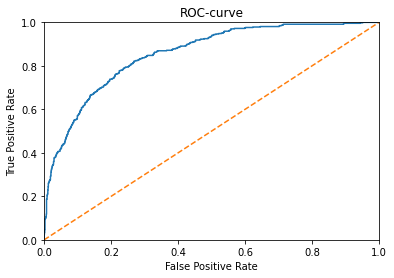

In [156]:
print('Accuracy   = {:.2f}'.format(accuracy_score(y_test, rf.predict(X_test))))
print('Recall     = {:.2f}'.format(recall_score(y_test, rf.predict(X_test))))
print('Precission = {:.2f}'.format(precision_score(y_test, rf.predict(X_test))))
print('F1         = {:.2f}'.format(f1_score(y_test, rf.predict(X_test))))
probabilities_valid = rf.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC    = {:.2f}'.format(roc_auc_score(y_test, probabilities_one_valid)))

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

### CatBoostClassifier


In [122]:
%%time
# tuning parameters

# fixing random state
random_state_value = 110

# parameters
rs_params = {
    'iterations':range(100,1000,100),
    'learning_rate':np.arange(0.001,0.5,0.01),
    'depth': range(1, 15, 1) 
}
# create RandomizedSearchCV
cat = RandomizedSearchCV(
    CatBoostClassifier(
        random_state=random_state_value,
        verbose=False),
        rs_params,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,        
        n_iter=20)
# train model
cat.fit(X_train, y_train)

Wall time: 18min 15s


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002A4DCA491F0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'depth': range(1, 15),
                                        'iterations': range(100, 1000, 100),
                                        'learning_rate': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491])},
                   scoring='roc_auc')

In [125]:
cat.best_params_

{'learning_rate': 0.21099999999999997, 'iterations': 900, 'depth': 3}

In [157]:
cat = CatBoostClassifier(learning_rate=0.2,
                            iterations=900,
                            depth=3,
                            verbose=False,
                            random_state=12345)

scores = cross_val_score(cat, X_train, y_train, cv=5, scoring='roc_auc')
print("CatBoostClassifier: mean_cross_val_score = {:.3f}".format(scores.mean()))

cat.fit(X_train, y_train)

CatBoostClassifier: mean_cross_val_score = 0.927


Accuracy   = 0.89
Recall     = 0.71
Precission = 0.84
F1         = 0.77
AUC-ROC    = 0.93


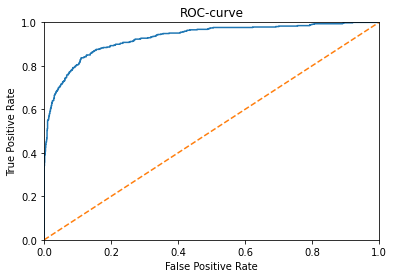

In [158]:
print('Accuracy   = {:.2f}'.format(accuracy_score(y_test, cat.predict(X_test))))
print('Recall     = {:.2f}'.format(recall_score(y_test, cat.predict(X_test))))
print('Precission = {:.2f}'.format(precision_score(y_test, cat.predict(X_test))))
print('F1         = {:.2f}'.format(f1_score(y_test, cat.predict(X_test))))
probabilities_valid = cat.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC    = {:.2f}'.format(roc_auc_score(y_test, probabilities_one_valid)))

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

### Conclusion.

We trained 4 models. The best result so far showed up CatBoostClassifier. So let's compare metrics for all models and choose the best one. 

## Comparing the results of models.

In [144]:
d = {'LinearRegressionClassifier': [0.80, 0.55, 0.64, 0.59, 0.84], 'DecisionTreeClassifier': [0.80, 0.43, 0.69, 0.53, 0.83], 
     'RandomForestClassifier': [0.81, 0.52, 0.70, 0.60, 0.86], 'CatBoostClassifier': [0.89, 0.71, 0.85, 0.77, 0.93]}

In [146]:
result = pd.DataFrame(data=d, index=['Accuracy', 'Recall', 'Precission', 'F1', 'AUC-ROC'])
result.style.highlight_max(color = 'lightgreen', axis = 1)

,LinearRegressionClassifier,DecisionTreeClassifier,RandomForestClassifier,CatBoostClassifier
Accuracy,0.800000,0.800000,0.810000,0.890000
Recall,0.550000,0.430000,0.520000,0.710000
Precission,0.640000,0.690000,0.700000,0.850000
F1,0.590000,0.530000,0.600000,0.770000
AUC-ROC,0.840000,0.830000,0.860000,0.930000


As we can see the best results gave us CatBoosClassifier model. The main metrics for our investigation Accuracy - 0.89 and AUC-ROC - 0.93, which is a very good result. 

The best model has hyperparameters are: 'learning_rate': 0.21099999999999997, 'iterations': 900, 'depth': 3. Let's check it on the test set.

In [161]:
cat_probs = cat.predict_proba(X_test)
cat_probs = cat_probs[:, 1]

In [162]:
print("CatBoostClassifier test ROC-AUC: {:.3f}".format(
    roc_auc_score(y_test, cat_probs)))

CatBoostClassifier test ROC-AUC: 0.929


In [164]:
cat_predicted = cat.predict(X_test)
print(classification_report(y_test, cat_predicted, digits=3))

              precision    recall  f1-score   support

           0      0.900     0.951     0.925      1294
           1      0.838     0.709     0.768       467

    accuracy                          0.886      1761
   macro avg      0.869     0.830     0.846      1761
weighted avg      0.884     0.886     0.883      1761



The AUC-ROC metric remains on a good level: 0.929

##  Importance of features for the best model.

Let's check which features the most important for our model.

In [165]:
df_cat_features = pd.DataFrame({'features': cat.feature_names_, 'score': cat.get_feature_importance()})
df_cat_features = df_cat_features.sort_values(by="score", ascending = False)

In [166]:
df_cat_features.head()

,features,score
16,Duration,65.333104
3,MonthlyCharges,12.943705
0,Type,6.805082
17,Services,2.572592
2,PaymentMethod,2.162326


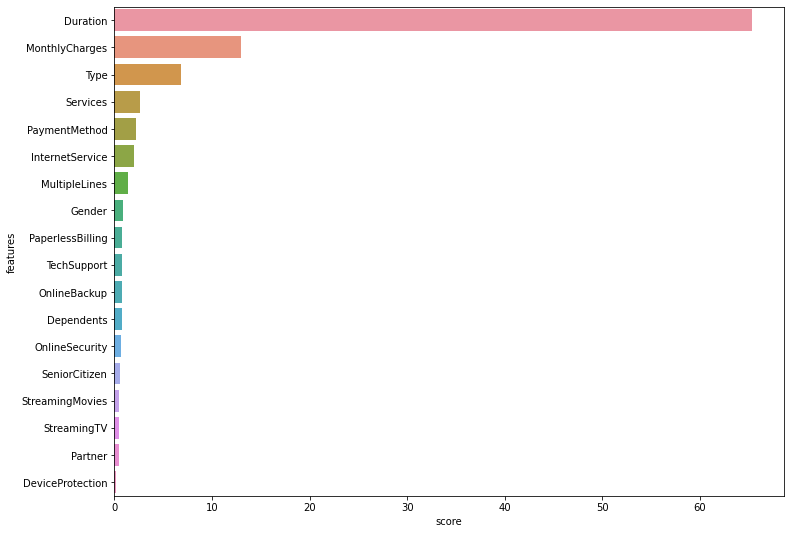

In [167]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(ax=ax, x=df_cat_features["score"], y=df_cat_features["features"])
plt.show()

The most important feature is *Duration* then follow such features as *MonthlyCharges*, *Type*, *Services* and *PaymentMethod*. 

# Overall Conclusion

We have 4 datasets. After loading them on the first look they didn't have missing values but preprocessing was needed since we was needed to merge them all. After investigating the data and merging tables a missing values appeared in phone and internet services. All of them were replaced by "No internet" and "No phone" since obviously not all users use those services. In the TotalCharges column were found 11 users who just signed up their contracts and haven't paid yet, spaces were replaced by 0. Columns 'gender' was renamed as 'Gender' so it won't differ from others. Column 'BeginDate' was converted to datetime format while downloading the dataset, but column 'EndDate' was object type, because there are dates only for client who exited. So this column was converted to the datetime format with NaT values for customers who still in company. 

**After EDA we can make such conclusions:**

 **1.** According to contract, billing and payment method data the category of churn customers mostly use Month-to-Month plan, paperless billings and electronic check payment method.
 
 **2.** Comparing the terminated and non-terminated contracts, we can see that in the terminated contracts the average monthly payment was higher, while the payment for the entire time was lower.
 
 **3.** There is no big difference between loyal and churn customers according to gender. 
 
 **4.** The number of people of retirement age is significantly less than the younger generation, but the outflow of older people is almost 2 times more than for young people.
 
 **5.** People who do not have a partner are more likely to terminate the contract.
 
 **6.** People without dependents are also prone to leaving.
 
 **7.** On the charts we see that among loyal customers there is a significant proportion of those who use only one service, primarily the Internet, among the departed customers the vast majority used all services. Considering individual services, we can say that users of several lines are less satisfied compared to one, and DSL compared to fiber.
 
**8.** On the charts, we see that contracts were actively concluded in 2014, then there was a decline with a gradual increase by 2020. But there are only 4 dates of termination of contracts, and all of them are only in 2019 and 2020. In this case, the reason may be that the data is artificial, but on real data it would be necessary first of all to check what happened on these dates. When considering the schedules of the duration of contracts, we can see that most of the contracts are terminated a short time after the conclusion, and old customers leave less often.

**9.** The strongest correlation with outflow is the number of days since the signing up the contract - it correlates negatively - the more days, the less likely it is to leave.The number of days and total costs are also strongly correlated with each other, which is quite logical, and the monthly payment with total costs.The remaining signs do not have a strong correlation with the outflow of customers.

We successfuly made a feature ingineering. We made encoding and scaling of the dataset and splitted it to the train and test sets. So now we can start to build our models.

We trained 6 models: 
 - Logistic Regression Classifier
 - DecisionTreeClassifier
 - Random Forest Classifier
 - CatBoostClassifier
 
 The best result gave us CatBoostClassifier with **Accuracy - 0.89** and **AUC-ROC - 0.93** with hyperparameters **Depth - 3**, **Learning rate - 0.21** and **Iterations - 900**. We trained it on the test set and **AUC-ROC** metric remains on the same level **0.929**. 
 
 After checking feature importances we can conclude that the best results of our metrics gave us first 5 more important features: *Duration*, *MonthlyCharges*, *Type*, *Services* and *PaymentMethod*. 
 
 Overall I think the goal of project was achieved successfully.

# Report

**What steps of the plan were performed and what steps were skipped (explain why)?**

I succeded to perfrom all steps I planed.

**What difficulties did you encounter and how did you manage to solve them?**

I've had a difficulty with building models. Actually firstly I didn't build them correct, cause didn't use cross validation. But after reviewers comment I studied this question more deeply and changed the hold code for models. Results achived are even better than were. 

**What were some of the key steps to solving the task?**

Actually the key steps were: 

 **1. Data preprocessing.** 
     
   It is very important to preprocess data well and correct. From this depend further results.
     
     
 **2. EDA.** 
 
   Very important to understand the data. Connections and correlation between features and target.
     
    
 **3. Model building.**
 
   Important to build model correct according to the data we have, counting all special parameters.
    
    
 **4. Model testing.**
 
   And final step is to see the performance of the best model on our test set. 
    


**What is your final model and what quality score does it have?**

The final model I have is THE catBoostClassifier. It showed up the best results: **Accuracy - 0.89** and **AUC-ROC - 0.93**.